In [4]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import logit, expit

C:\Users\sszczesn\AppData\Local\Continuum\anaconda3\envs\VR\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1. Normal distribution. 
Using histograms with and without cumulative option observe how increasing variance and mean changes look of the distribution.
Check how number of bins influences the plots. Consider what would make normal distribution weekly informative and what will make it informative.

In [6]:
mu, sigma = [0,1,2,3], [1,3.5,0.1,15]
Dict = {'mu='+str(mu[i])+',sigma='+str(sigma[i]):np.random.normal(mu[i],sigma[i],1000) for i in range(4)}
Dict

{'mu=0,sigma=1': array([-7.92788483e-01,  2.31480606e+00, -7.67083075e-01,  2.98050381e+00,
         9.53086547e-01,  8.06964908e-01,  1.62824610e+00,  2.06915388e-01,
         6.78817031e-01,  5.13415545e-01, -4.18389714e-01, -1.21977849e+00,
         6.29615817e-01, -7.74599307e-02, -1.64980192e-01, -7.87210097e-01,
         1.53945814e+00, -4.71955570e-01,  4.45028726e-01,  5.60303480e-01,
        -2.50872271e-02, -5.61344478e-02,  1.84310748e+00, -1.12076648e+00,
        -1.32535494e+00, -3.30729076e-01, -1.05233277e+00,  7.52767259e-01,
         1.66884666e+00, -1.23527201e+00,  9.16002979e-01, -1.24116189e+00,
         1.30533865e+00, -7.17637663e-01,  1.27032336e+00,  3.79946619e+00,
         8.68920355e-01, -8.38005573e-02, -2.31950074e-01, -7.61374288e-01,
         5.55678878e-01,  8.57318429e-01,  2.54090895e+00, -8.52770036e-01,
        -9.14353024e-01, -6.65034425e-01, -6.53047276e-01, -6.60647853e-01,
        -2.30716459e-01, -1.63435267e-01, -1.51090770e-01,  1.40851705e+

In [7]:
df = pd.DataFrame(Dict)
df_melted = df.melt()
df_melted

,variable,value
0,"mu=0,sigma=1",-0.792788
1,"mu=0,sigma=1",2.314806
2,"mu=0,sigma=1",-0.767083
3,"mu=0,sigma=1",2.980504
4,"mu=0,sigma=1",0.953087
...,...,...
3995,"mu=3,sigma=15",-32.104880
3996,"mu=3,sigma=15",3.293993
3997,"mu=3,sigma=15",3.768303
3998,"mu=3,sigma=15",-6.929896


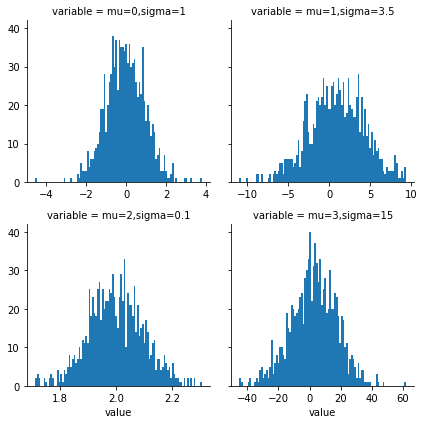

In [9]:
grid = sns.FacetGrid(df_melted, col='variable', sharex=False, col_wrap=2)
grid.map(plt.hist, "value", cumulative=0, bins=100)

Normal distribution could become weakly informative if we increase the deviation of the values - it becomes too vague to represent a value closely. Weak informativity would be also conjointly achieved by decreasing the number of the histogram's bins - quantizing the distribution too loosely.

### 2. Transform samples from normal distribution with inverse logit. 
Consider how mean and standard deviation influence the shape of histogram and cdf. Is previously non-informative normal is still non-informative after transformation?

In [22]:
dfx = expit(df)
dfxm = dfx.melt()
dfxm

,variable,value
0,"mu=0,sigma=1",3.115702e-01
1,"mu=0,sigma=1",9.100959e-01
2,"mu=0,sigma=1",3.171104e-01
3,"mu=0,sigma=1",9.516855e-01
4,"mu=0,sigma=1",7.217355e-01
...,...,...
3995,"mu=3,sigma=15",1.140323e-14
3996,"mu=3,sigma=15",9.642221e-01
3997,"mu=3,sigma=15",9.774299e-01
3998,"mu=3,sigma=15",9.771466e-04


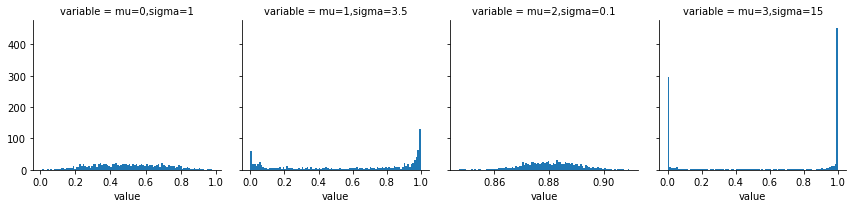

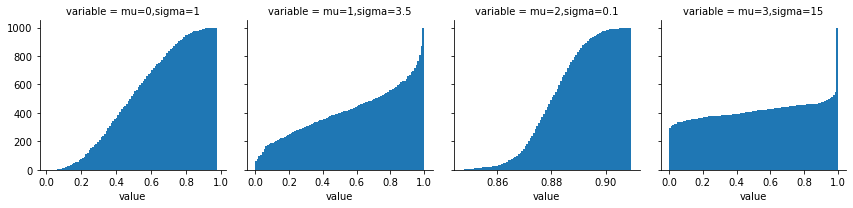

In [23]:
gxp = sns.FacetGrid(dfxm, col='variable', sharex=0, col_wrap=4)
gxp.map(plt.hist, 'value', cumulative=0, bins=100)
gxpcum = sns.FacetGrid(dfxm, col='variable', sharex=0, col_wrap=4)
gxpcum.map(plt.hist,'value',cumulative=1, bins=100)
plt.show()

Yes, the non-informative one is still non-informative.

### 3. Poisson distribution.
This distribution returns integers (give histogram location of bins instead of their numbers), depending on intensity. This is a good distribution for modelling countable effects. Observe how mean and variance influence the shape.

In [24]:
Dictp ={"PoissonInterval=1":np.random.poisson(1,1000),
    "PoissonInterval=3":np.random.poisson(3,1000),
    "PoissonInterval=10":np.random.poisson(10,1000),
    "PoissonInterval=15":np.random.poisson(15,1000)}
dfp = pd.DataFrame(Dictp)
dfpm = dfp.melt()
dfpm

,variable,value
0,PoissonInterval=1,1
1,PoissonInterval=1,0
2,PoissonInterval=1,2
3,PoissonInterval=1,6
4,PoissonInterval=1,1
...,...,...
3995,PoissonInterval=15,12
3996,PoissonInterval=15,13
3997,PoissonInterval=15,13
3998,PoissonInterval=15,15


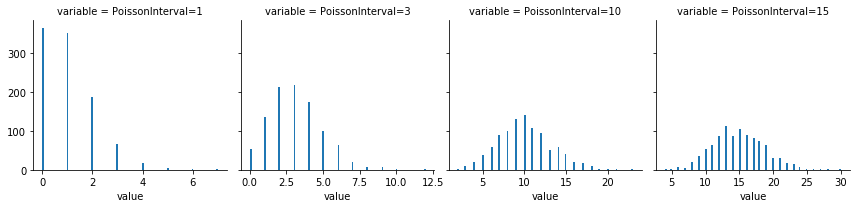

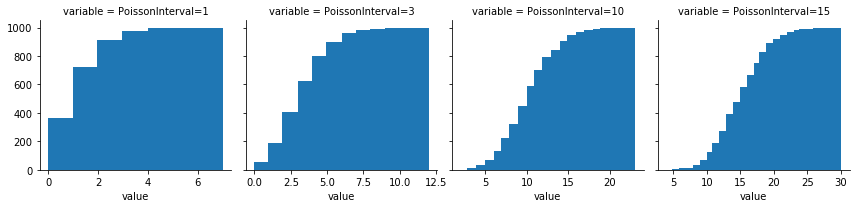

In [28]:
gp=sns.FacetGrid(dfpm, col="variable", sharex=False, col_wrap=4)
gp.map(plt.hist, "value", cumulative=False, bins=100)
gpcum=sns.FacetGrid(dfpm, col="variable", sharex=False, col_wrap=4)
gpcum.map(plt.hist, "value", cumulative=True, bins=100)
plt.show()

### 4. Beta distribution.
This is a distribution defined on [0,1] interval. It is useful as a prior for probability parameters (like binomial distribution). Traditionally it is defined with $\alpha$ and $\beta$ parameters. There are however different reparametrizations possible. Verify how beta distributions behave for their natural parametrization, location dispersion parametrization and mean-population size parametrization (see lecture notes).

In [30]:
Dictb={ "alpha=1,beta=1":np.random.beta(1,1,1000),
    "alpha=5,beta=1":np.random.beta(5,1,1000),
    "alpha=1,beta=5":np.random.beta(1,5,1000),
    "alpha=5,beta=5":np.random.beta(5,5,1000)}
dfb = pd.DataFrame(Dictb)
dfbm = dfb.melt()
dfbm

,variable,value
0,"alpha=1,beta=1",0.512029
1,"alpha=1,beta=1",0.780641
2,"alpha=1,beta=1",0.957649
3,"alpha=1,beta=1",0.012158
4,"alpha=1,beta=1",0.909547
...,...,...
3995,"alpha=5,beta=5",0.310139
3996,"alpha=5,beta=5",0.802725
3997,"alpha=5,beta=5",0.726244
3998,"alpha=5,beta=5",0.249848


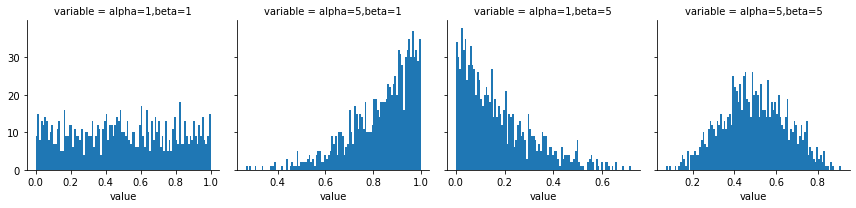

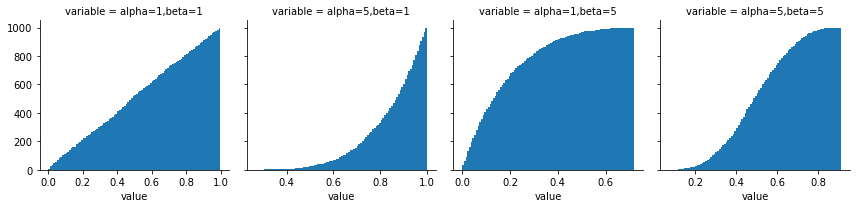

In [32]:
gb=sns.FacetGrid(dfbm, col="variable", sharex=False, col_wrap=4)
gb.map(plt.hist, "value", cumulative=False, bins=100)
gbcum=sns.FacetGrid(dfbm, col="variable", sharex=False, col_wrap=4)
gbcum.map(plt.hist, "value", cumulative=True, bins=100)
plt.show()

### 5. Log-normal distribution.
This is a great distributions for positive variables, especially if scale can differ (for example salaries). Assumtion is that the logarithm of variable of interest is normaly distributed. Observe how mean and variance of normal distribution are propagating through transformation.

In [34]:
Dictl = {"M=0_S=1":np.random.lognormal(size=1000),
    "M=2_S=0.2":np.random.lognormal(2,0.2,1000),
    "M=1_S=0.5":np.random.lognormal(0,0.5,1000),
    "M=10_S=1":np.random.lognormal(10,1,1000)}
dfl = pd.DataFrame(Dictl)
dflm = dfl.melt()
dflm

,variable,value
0,M=0_S=1,1.722809
1,M=0_S=1,0.562931
2,M=0_S=1,2.155526
3,M=0_S=1,3.453664
4,M=0_S=1,2.206895
...,...,...
3995,M=10_S=1,6154.564206
3996,M=10_S=1,23196.239154
3997,M=10_S=1,6315.637112
3998,M=10_S=1,16460.429098


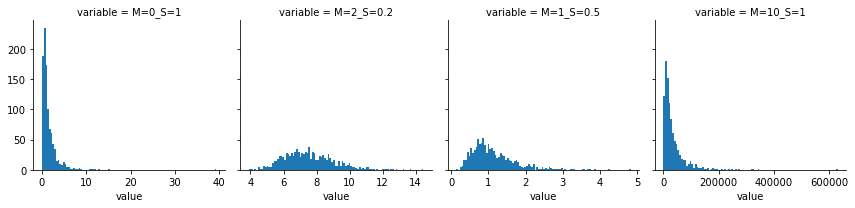

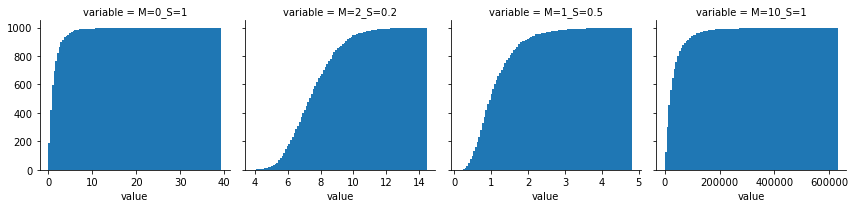

In [38]:
gl=sns.FacetGrid(dflm, col="variable", sharex=False, col_wrap=4)
gl.map(plt.hist, "value", cumulative=False, bins=100)
glcum=sns.FacetGrid(dflm, col="variable", sharex=False, col_wrap=4)
glcum.map(plt.hist, "value", cumulative=True, bins=100)
plt.show()